In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
data = sm.datasets

In [2]:
Education_data = pd.read_csv('/Users/riddhi/Documents/GitHub/homework-2-riddhi-ka-1/EducationDataPortal_10.20.2022_all_files 3/EducationDataPortal_10.20.2022_years_after_entry.csv')

In [3]:
Education_data.columns = Education_data.columns.str.replace(' ', '')
Education_data.head()

,year,unitid,inst_name,state_abbr,years_after_entry,earnings_greater_than_25k_pct,earnings_female_mean,earnings_male_mean
0,2013,130934,DELAWARE STATE UNIVERSITY,DE,10,0.669,36900.0,36100.0
1,2013,130934,DELAWARE STATE UNIVERSITY,DE,8,0.635,NaN,NaN
2,2013,130934,DELAWARE STATE UNIVERSITY,DE,6,0.563,29500.0,29400.0
3,2013,130907,Delaware Technical Community College-Terry,DE,10,0.642,35800.0,41700.0
4,2013,130907,Delaware Technical Community College-Terry,DE,8,0.561,NaN,NaN


In [4]:
Education_data.drop(["unitid"], axis=1 , inplace=True)
Education_data.drop(["state_abbr"], axis=1 , inplace=True)
Education_data.drop(["earnings_female_mean"], axis=1 , inplace=True)
Education_data.drop(["earnings_male_mean"], axis=1 , inplace=True)
Education_data = Education_data[Education_data['years_after_entry'] == 10]

In [5]:
Education_data.head()
DST_data = Education_data[Education_data['inst_name'] == 'DELAWARE STATE UNIVERSITY']
DST_data.head()

,year,inst_name,years_after_entry,earnings_greater_than_25k_pct
0,2013,DELAWARE STATE UNIVERSITY,10,0.669000
9,2012,DELAWARE STATE UNIVERSITY,10,0.656000
18,2011,DELAWARE STATE UNIVERSITY,10,0.657559
33,2009,DELAWARE STATE UNIVERSITY,10,0.715742
48,2007,DELAWARE STATE UNIVERSITY,10,0.729862


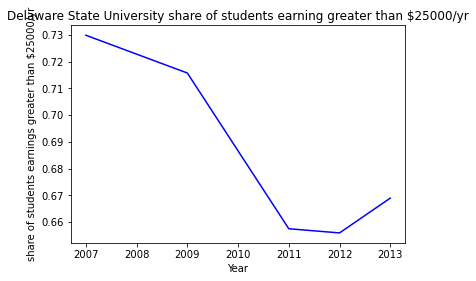

In [6]:
fig, ax = plt.subplots()
ax.plot(DST_data['year'], DST_data['earnings_greater_than_25k_pct'], 'b-')
ax.set_title('Delaware State University share of students earning greater than $25000/yr')
ax.set_xlabel('Year')
ax.set_ylabel('share of students earnings greater than $25000/yr');

In [7]:
plt.savefig('/Users/riddhi/Documents/GitHub/homework-2-riddhi-ka-1/static plot.png')

<Figure size 432x288 with 0 Axes>

In [8]:
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual
import pandas_datareader.data as web

In [9]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [10]:
from bokeh.models.widgets import Panel, Tabs
from ipywidgets import Dropdown

In [11]:
institute_name = Education_data.reset_index()['inst_name'].unique()
institute_name

array(['DELAWARE STATE UNIVERSITY',
       'Delaware Technical Community College-Terry',
       'UNIVERSITY OF DELAWARE'], dtype=object)

In [12]:
DST = Education_data[Education_data['inst_name'] == 'DELAWARE STATE UNIVERSITY']
DTC = Education_data[Education_data['inst_name'] == 'Delaware Technical Community College-Terry']
UOD = Education_data[Education_data['inst_name'] == 'UNIVERSITY OF DELAWARE']

In [13]:
plot = figure(title='share of earnings higher than $25000/yr', x_axis_label='Year', y_axis_label='Earnings per share')

plot.line( DST.year, DST['earnings_greater_than_25k_pct'], legend_label='DELAWARE STATE UNIVERSITY')
plot.circle(DST.year, DST['earnings_greater_than_25k_pct'], color='black')

plot.line(DTC.year, DTC['earnings_greater_than_25k_pct'], legend_label='Delaware Technical Community College-Terry', color='orange')
plot.circle(DTC.year, DTC['earnings_greater_than_25k_pct'], color='black')

plot.line(UOD.year, UOD['earnings_greater_than_25k_pct'], legend_label='UNIVERSITY OF DELAWARE', color='pink')
plot.circle(UOD.year, UOD['earnings_greater_than_25k_pct'], color='black')

show(plot)

My research question was about the share of individuals earning greater than $25,000 after being out of school for 10 years, which for the Delaware state University is plummeting for the incoming years, which should have been increasing. As I believe as the experinence and years go by the share of Individuals should increase rather than decrea.  But as we compare the same data for other universities in Delaware it seems the drop is higher for Delaware technical Community colege and Delaware state Univeristy but surprisingly the University of delaware seems to be relatively better and not have a huge drop. 

Though the reason for this needs to account for factors such as Public/Private university, the classroom size of students and the number of students graduating. 
I feel the interactive plot of bokeh is a better tool to compare and contrast and better to make people understand the trend in the data. 

As seen the code is pretty basic lets the reader understand when what fucntion is being used and easier to reflect what the function does. 